# Customer Churn Analysis at ABC Company

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Customer Churn.csv")
df.head()

EmptyDataError: No columns to parse from file

## Read all the  Columns

In [ ]:
df.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')>

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Replace Blank with 0 as tenure is 0 and no total charges are recorded

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(" ",0)

# Covert TotalCharges to numeric

df['TotalCharges'] = df['TotalCharges'].astype('Float64')

In [ ]:
df['TotalCharges'].dtype

Float64Dtype()

## Check Again to veryfy

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Check Null Values

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- There is no Null Value from the database.

### Know All Statistics Values

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.0
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.79447
min,0.000000,0.000000,18.250000,0.0
25%,0.000000,9.000000,35.500000,398.55
50%,0.000000,29.000000,70.350000,1394.55
75%,0.000000,55.000000,89.850000,3786.6
max,1.000000,72.000000,118.750000,8684.8


## CHECK DUPLICATED VALUES

In [ ]:
df.duplicated().sum()

0

- No Duplicated Values are here

## Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [ ]:
def cov(value):
    return "yes" if value == 1 else "no"

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(cov)

In [ ]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
no     5901
yes    1142
Name: count, dtype: int64

### *1.* Number of Customer who Churned

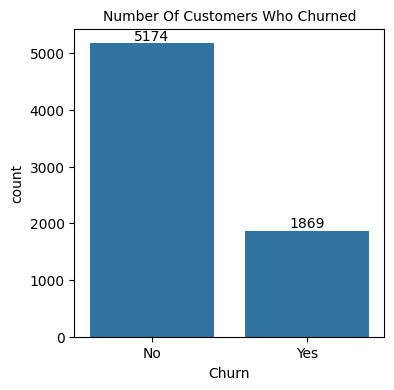

In [ ]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = df['Churn'], data = df)
ax.bar_label(ax.containers[0])
plt.title("Number Of Customers Who Churned", fontsize = 10)
plt.show()

### *2.* Percentage of Customers who Churned - 

In [ ]:
gb = df.groupby("Churn").agg({'Churn':"count"})
gb.index

Index(['No', 'Yes'], dtype='object', name='Churn')

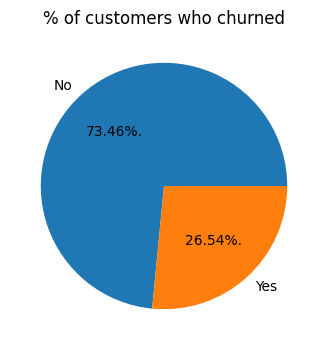

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%.")
plt.title("% of customers who churned")
plt.show()

- From the given pie chart we can conclude that 26.54% of our customers have churned out.
- no let's explore the reason behind it

### *3*. Count the number of the Churned customer male / female in the database.

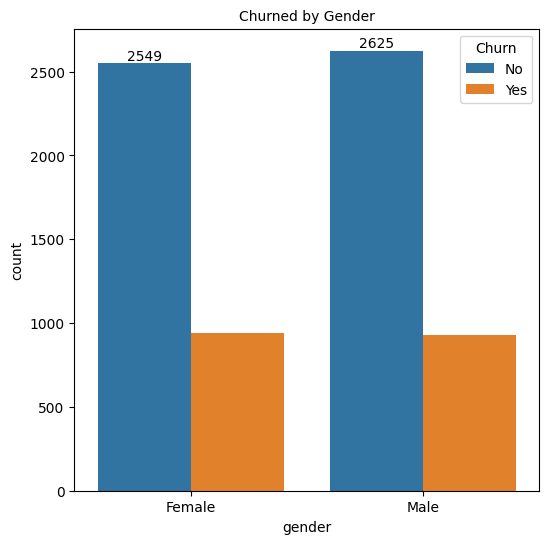

In [ ]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x = df['gender'], data = df, hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Churned by Gender", fontsize  = 10)
plt.show()

### *4.* Chured by seniorCitizen

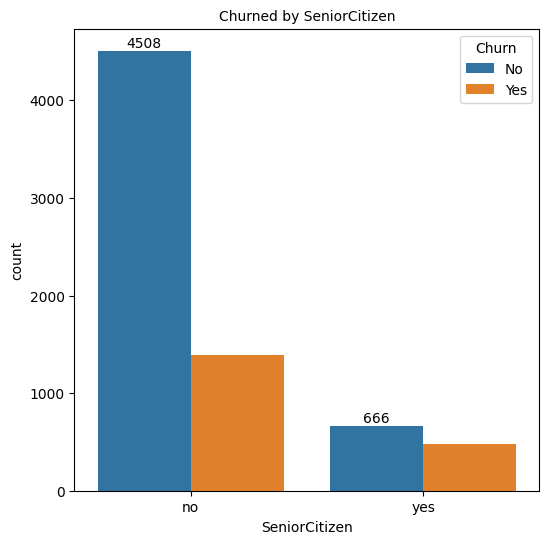

In [ ]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x = df['SeniorCitizen'], data = df, hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Churned by SeniorCitizen", fontsize  = 10)
plt.show()

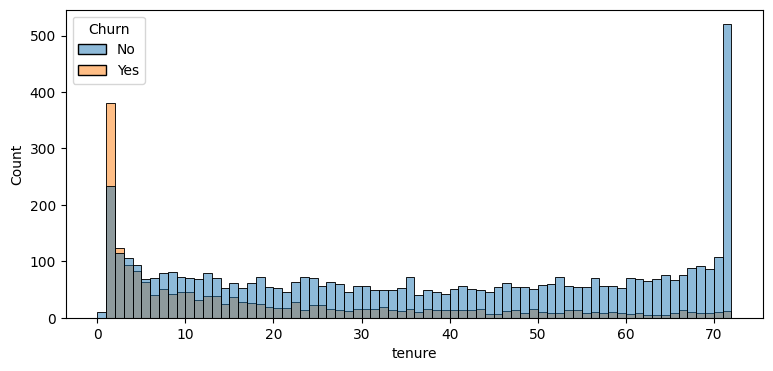

In [ ]:
plt.figure(figsize=(9,4))
sns.histplot(x = "tenure", data = df, bins =72, hue='Churn')
plt.show()

- People who have used our services for a long time have stayed and people who have use our services for a short time have left. This is a good sign that our services are good.

In [ ]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


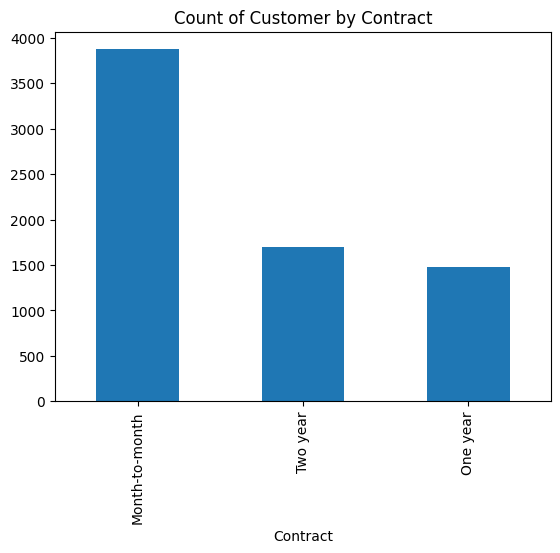

In [ ]:
df['Contract'].value_counts().plot(kind='bar')
plt.title("Count of Customer by Contract")
plt.show()

- People who have month to month contract are likely to churned more than those who have 1 or 2 years contract.

In [ ]:
new_df_dummies = pd.get_dummies(df)
new_df_dummies = new_df_dummies.astype(int)
new_df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1,29,29,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,34,56,1889,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
2,2,53,108,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,45,42,1840,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
4,2,70,151,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
df = pd.read_csv("./Customer Churn.csv")

In [ ]:
df.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')>

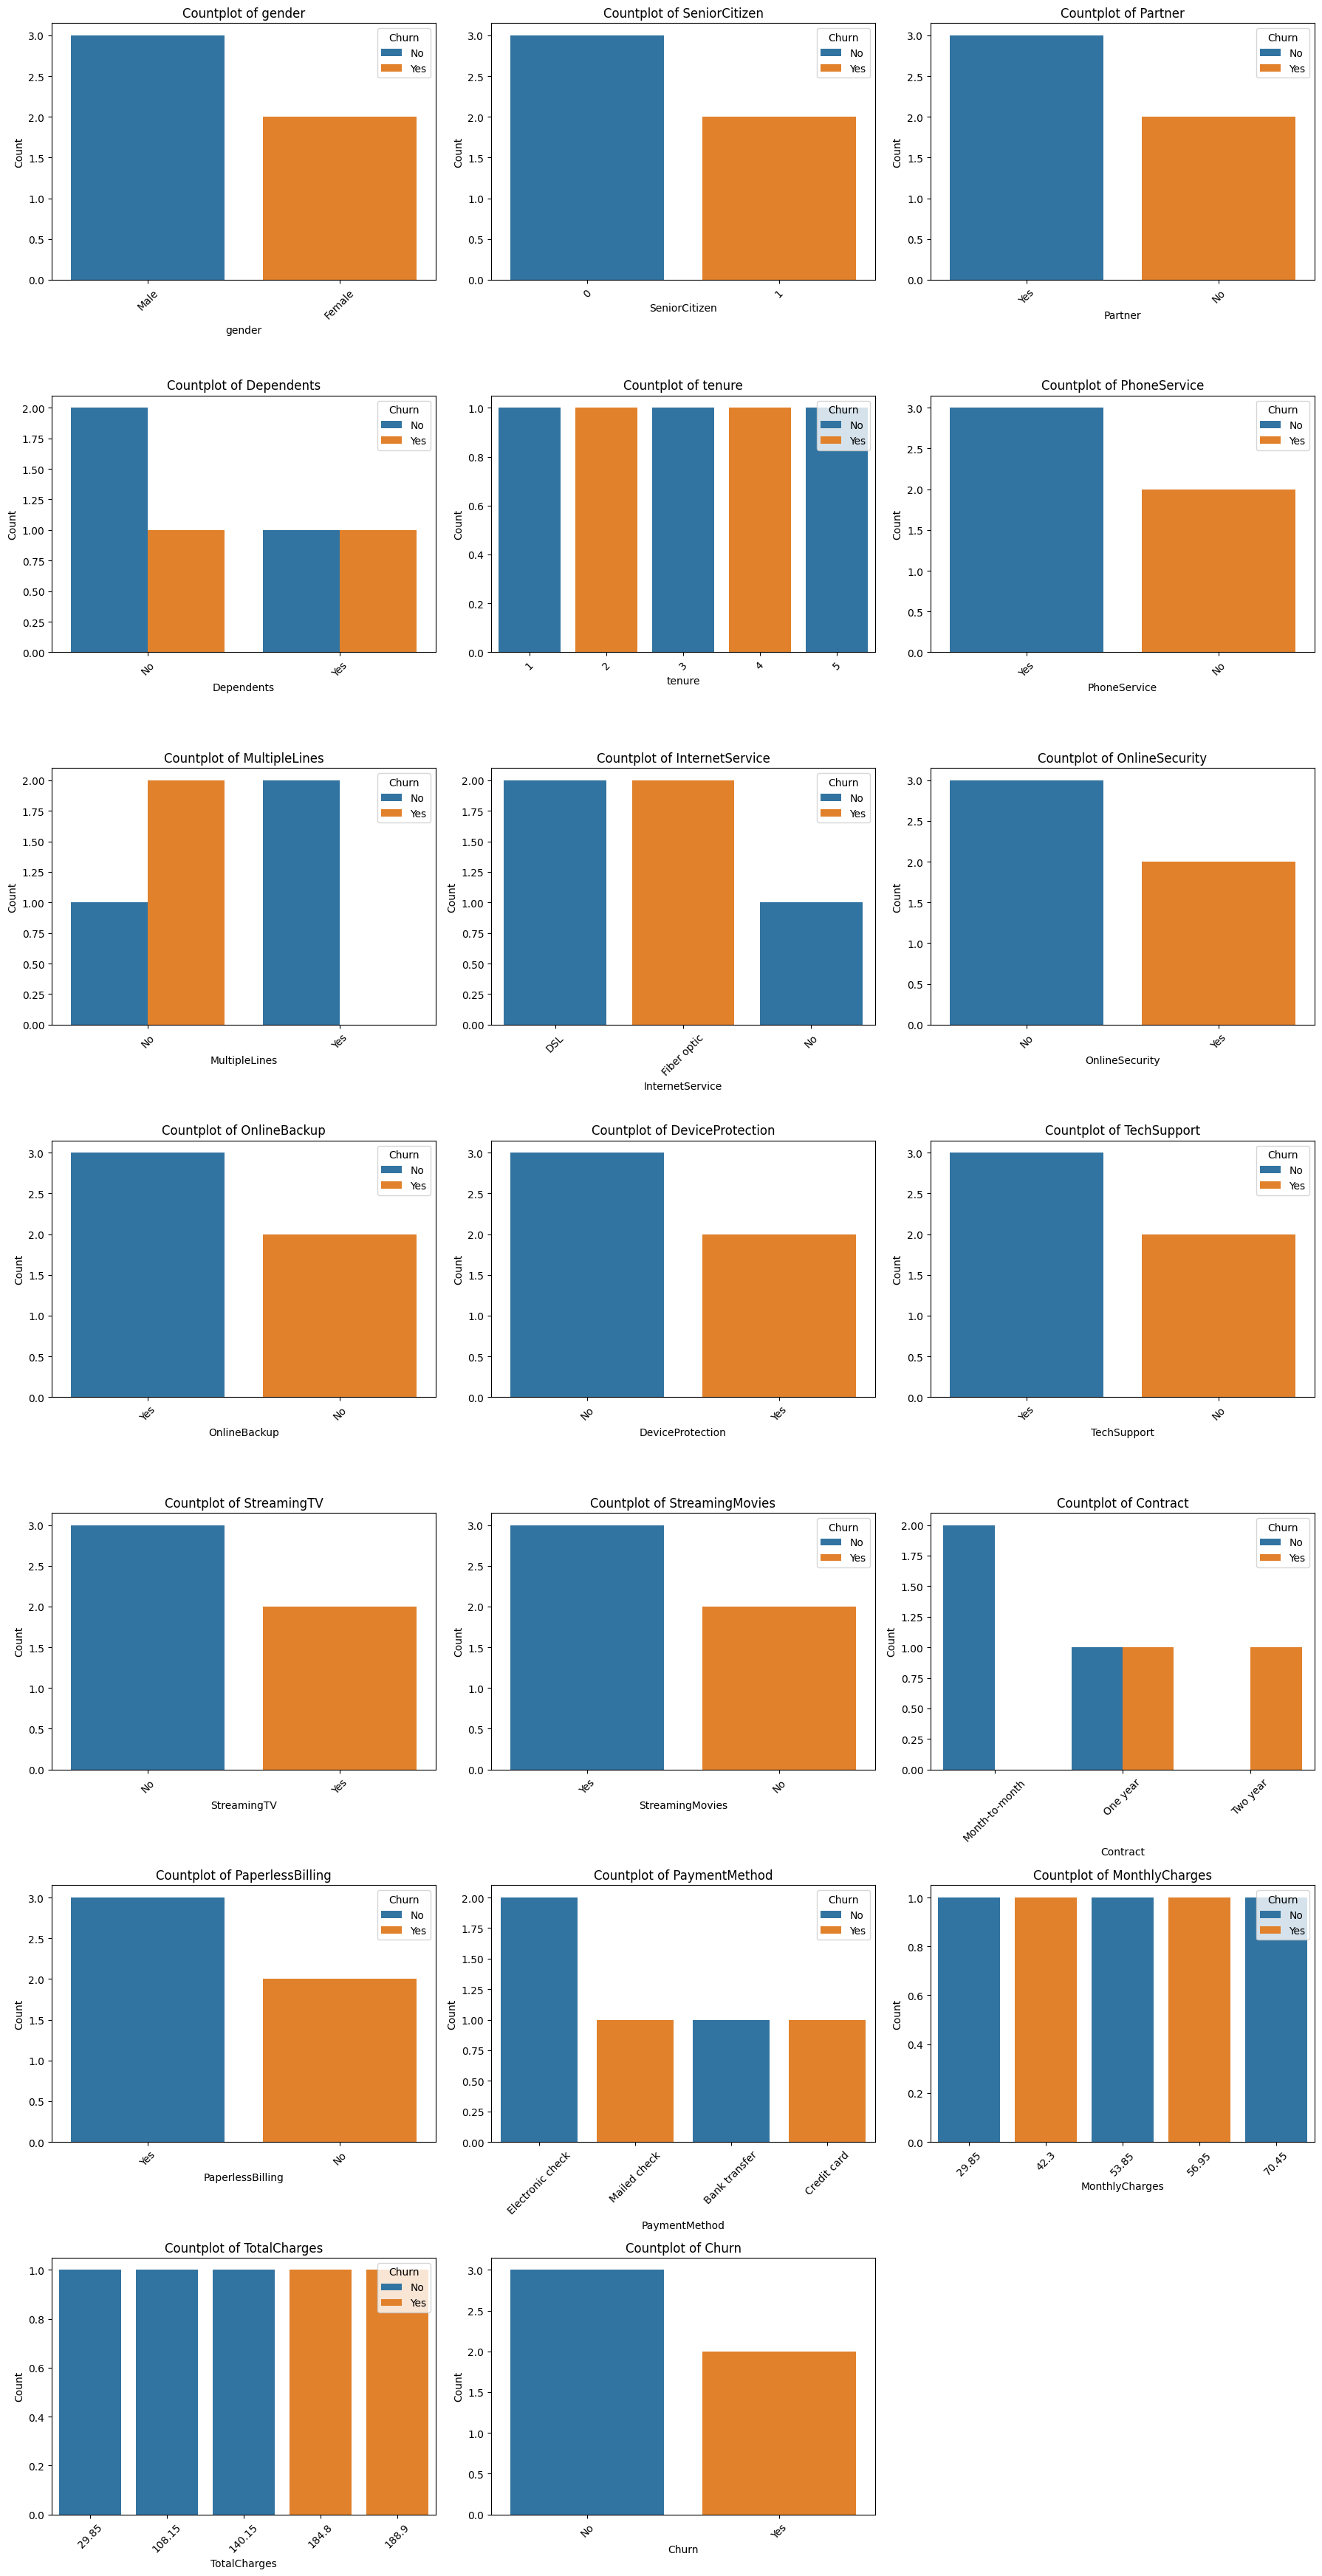

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# Sample DataFrame (replace with your actual dataset)


# Remove 'customerID' as it's not a categorical column to plot counts
columns_to_plot = [col for col in df.columns if col != 'customerID']

# Define the number of subplots needed
num_cols = len(columns_to_plot)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

# Create the subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 5))
axes = axes.flatten()

# Plot each column as a countplot
for i, col in enumerate(columns_to_plot):
    sns.countplot(data=df, x=col, ax=axes[i], hue='Churn')
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
